### Challenge - Chemical Segregation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [143]:
X_train = pd.read_csv("chem seg datasets/Training Data_chemical_seg/Logistic_X_Train.csv")
Y_train = pd.read_csv("chem seg datasets/Training Data_chemical_seg/Logistic_Y_Train.csv")

In [144]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [145]:
Y_train.head()

,label
0,1
1,1
2,1
3,0
4,0


In [173]:
u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
# Normalisation
X_train = (X_train - u)/std

In [147]:
X_train = X_train.values

In [148]:
Y_train = Y_train.values

In [149]:
Y_train = Y_train.reshape((-1,))

### Implement Logistic regression

In [150]:
def sigmoid(x):
    return 1.0/(1.0+ np.exp(-1.0*x))

def hypothesis(X,theta):
    y_ = sigmoid(np.dot(X,theta))
    return y_

def error(X,y,theta):
    Loss =0.0
    hi = hypothesis(X,theta)
    Loss = -1.0*np.mean((y*np.log2(hi)) + ((1 - y)*np.log2(1 - hi)))
    return Loss/X.shape[0]


def gradient(X,y,theta):
    grad = np.zeros((X.shape[1],))
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y - y_))
    return -1*grad/X.shape[0]

def gradient_descent(X,y,lr=0.1,max_iters=300):
    theta = np.zeros((X.shape[1],))
    error_list =[]
    for i in range(max_iters):
        error_list.append(error(X,y,theta))
        # gradient
        if i ==5:
            print(hypothesis(X,theta))

        grad = gradient(X,y,theta)
        theta = theta - lr*grad

    return theta,error_list

def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    print(h[:5])

    return output

In [151]:
one = np.ones((X_train.shape[0],1))
X_ = np.hstack((one,X_train))

In [152]:
theta,error_list = gradient_descent(X_,Y_train)

[0.56189659 0.58420388 0.57542208 ... 0.58336769 0.39370743 0.59189286]


In [153]:
theta

array([-0.24076709, -2.12182006,  1.0652519 , -2.04371378])

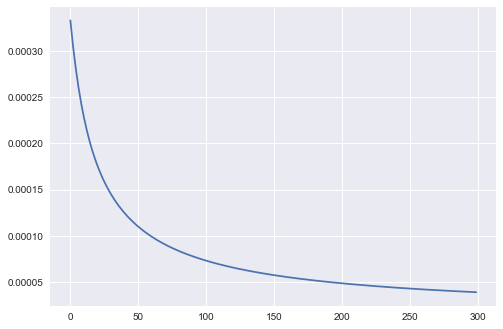

In [156]:
plt.style.use("seaborn")
plt.plot(error_list)

In [157]:
# error_list

[0.0003333333333333333,
 0.00031860329596775105,
 0.00030506421709859476,
 0.00029260624593039746,
 0.00028112699577840004,
 0.00027053226857212204,
 0.0002607362619767908,
 0.00025166140650537854,
 0.00024323795922080564,
 0.00023540345400712914,
 0.00022810208221366913,
 0.00022128405493981269,
 0.00021490498040075993,
 0.00020892527655787293,
 0.00020330962982413137,
 0.00019802650432630909,
 0.00019304770213340595,
 0.00018834797239143642,
 0.0001839046659324541,
 0.00017969743127886888,
 0.00017570794777905496,
 0.00017191969170550373,
 0.00016831773140080507,
 0.000164888547890296,
 0.00016161987774319532,
 0.000158500575326003,
 0.00015552049193541637,
 0.00015267036961393878,
 0.0001499417477359412,
 0.00014732688070462506,
 0.0001448186653224213,
 0.00014241057659113913,
 0.00014009661086638776,
 0.00013787123543627366,
 0.0001357293437198959,
 0.00013366621538928118,
 0.00013167748081145352,
 0.00012975908928738965,
 0.00012790728063348823,
 0.00012611855971046842,
 0.0001243

In [160]:
df = pd.DataFrame(predict(X_,theta),columns=["label"])

[0.91872583 0.96870343 0.97716013 0.0125769  0.13236235]


In [161]:
df.head()

,label
0,1
1,1
2,1
3,0
4,0


In [162]:
df.to_csv('test1_seg',index=False)

In [163]:
X_test = pd.read_csv("chem seg datasets/Test Cases_chem_seg/Logistic_X_Test.csv")

In [164]:
X_test = X_test.values

In [174]:
# Normalization -->
X_test = (X_test -u)/std

In [175]:
df1 = pd.DataFrame(predict(np.hstack((np.ones((X_test.shape[0],1)),X_test)),theta),columns=["label"])

[0.99807018 0.99168698 0.0066138  0.99107422 0.99467494]


In [176]:
df1.head()

,label
0,1
1,1
2,0
3,1
4,1


In [177]:
df1.to_csv("test4_seg.csv",index=False)